### Сформулируем парадокс Монти Холла:
Вы выбираете случайную дверь, затем ведущий открывает какую-то дверь, за которой нет приза. Стоит ли вам изменить свой выбор?

#### Создадим сначала ведущего: алгоритм, который зная вероятность выбирает дверь, которую нужно открыть и показывает ее игроку.

In [66]:
from random import randint as choice

def host(pick : int, door_with_prize : int):
    if pick in [0, 1, 2]:
        doors_left = [0, 1, 2]
        doors_left.remove(pick)
        if door_with_prize == id:
            return doors_left[choice(0,1)]
        else:
            return doors_left[1] if (door_with_prize == 0) else doors_left[0]
        
        

#### Давайте протестируем

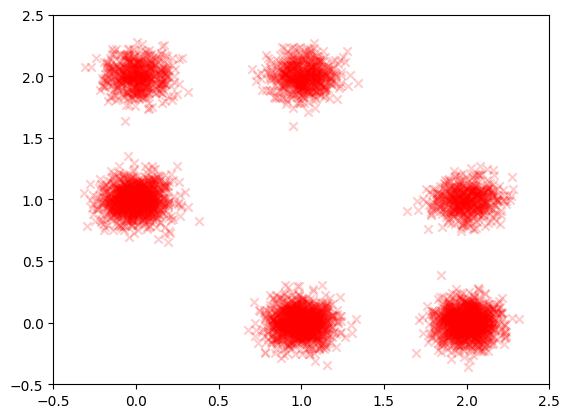

In [67]:
import numpy as np 
from matplotlib import pyplot as plt

n = 5000
picks = np.random.choice([0, 1, 2], n)
doors_with_prizes = np.random.choice([0, 1, 2], n)
merged = np.stack((picks, doors_with_prizes), axis=-1)

host_answers = []

for pick, door in merged:
    host_answers.append(host(pick, door))

scatter_dots = plt.scatter(picks, host_answers, marker='x', color='red', alpha=0.2)

xy = scatter_dots.get_offsets()

scatter_dots.set_offsets(xy + np.random.normal(0, 0.1, size=xy.shape))

plt.xlim(-0.5, 2.5)
plt.ylim(-0.5, 2.5)
plt.show()